In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/CA/Bank_Churn.csv")
df=df.drop(['CustomerId', 'Surname'],axis=1)

ENCODING

In [2]:
le_geo = LabelEncoder()
le_gen = LabelEncoder()
df['Gender'] = le_gen.fit_transform(df['Gender'])
df['Geography'] = le_geo.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


FEATURE SELECTION , SCALING , SPLITING

In [3]:
X=df.drop('Exited',axis=1)
y=df['Exited']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


FINDING BEST VALUE OF K 

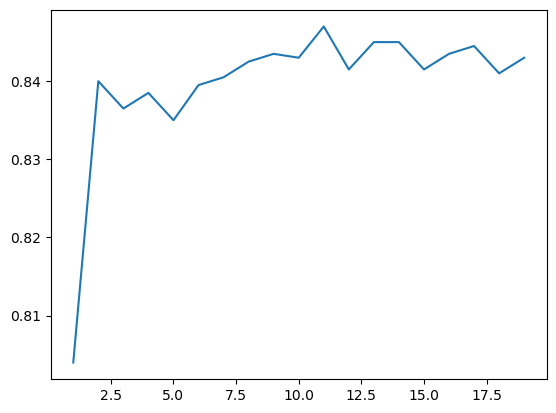

In [4]:
scores=[]
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,20),scores)



TRAINING AND PREDECTION

In [5]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)



CHECKING PERFORMANCE OF MODEL

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.71      0.37      0.49       393

    accuracy                           0.85      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



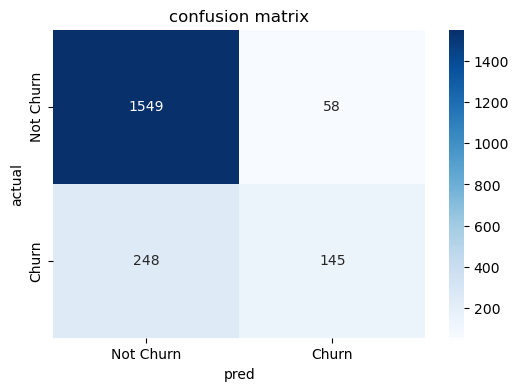

In [6]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel("pred")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [7]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred));

0.847
0.7142857142857143
0.36895674300254455
0.4865771812080537


In [8]:
def predict_user(credit_score, geography, gender, age, tenure, balance,
                 num_products, has_card, is_active, salary):

    geo_enc = le_geo.transform([geography])[0] 
    gen_enc = le_gen.transform([gender])[0] 

    user_df = pd.DataFrame([[
        credit_score, geo_enc, gen_enc, age, tenure, balance,
        num_products, has_card, is_active, salary
    ]], columns=X.columns)

    user_scaled = scaler.transform(user_df)

    pred = knn.predict(user_scaled)[0]

    return "Churn" if pred == 1 else "Not Churn"


In [9]:
predict_user(619, "France", "Female", 42, 2, 0.00, 1, 1, 1, 101348.88)


'Not Churn'

In [10]:
predict_user(600, "Germany", "Male", 50, 5, 150000, 1, 1, 0, 120000)


'Churn'

In [11]:
summary=df.groupby("Exited")[
    ["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
].mean()

summary


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [12]:
not_churn = summary.loc[0]

print("ABOUT NOT CHURN (0) CUSTOMERS")
print(f"- They are usually ACTIVE members (Avg Active Score = {not_churn['IsActiveMember']:.2f})")
print(f"- Most of them belong to France (lowest churn region)")
print(f"- Female customers churn less, so they appear more in this group")
print(f"- They maintain a MODERATE balance (Avg Balance ≈ {not_churn['Balance']:.0f})")
print(f"- Most of them HAVE a Credit Card (Avg = {not_churn['HasCrCard']:.2f})")
print(f"- They typically hold ONLY ONE product (Avg Products = {not_churn['NumOfProducts']:.1f})")

churn = summary.loc[1]

print("\nABOUT CHURN (1) CUSTOMERS")
print(f"- They are usually INACTIVE members (Avg Active Score = {churn['IsActiveMember']:.2f})")
print(f"- Many customers come from GERMANY, which has the highest churn rate")
print(f"- They maintain a HIGH balance (Avg Balance ≈ {churn['Balance']:.0f})")
print(f"- They tend to be OLDER (Avg Age ≈ {churn['Age']:.0f})")
print(f"- They usually have ONLY ONE product (Avg Products = {churn['NumOfProducts']:.1f})")
print(f"- They earn a HIGH salary (Avg Salary ≈ {churn['EstimatedSalary']:.0f})")
print(f"- Their tenure is MID-RANGE (Avg Tenure ≈ {churn['Tenure']:.1f})")


ABOUT NOT CHURN (0) CUSTOMERS
- They are usually ACTIVE members (Avg Active Score = 0.55)
- Most of them belong to France (lowest churn region)
- Female customers churn less, so they appear more in this group
- They maintain a MODERATE balance (Avg Balance ≈ 72745)
- Most of them HAVE a Credit Card (Avg = 0.71)
- They typically hold ONLY ONE product (Avg Products = 1.5)

ABOUT CHURN (1) CUSTOMERS
- They are usually INACTIVE members (Avg Active Score = 0.36)
- Many customers come from GERMANY, which has the highest churn rate
- They maintain a HIGH balance (Avg Balance ≈ 91109)
- They tend to be OLDER (Avg Age ≈ 45)
- They usually have ONLY ONE product (Avg Products = 1.5)
- They earn a HIGH salary (Avg Salary ≈ 101466)
- Their tenure is MID-RANGE (Avg Tenure ≈ 4.9)


In [ ]:
# joblib.dump(knn, "knn.pkl")
# joblib.dump(scaler, "knn_scaler.pkl")
# joblib.dump(le_gen, "le_gen.pkl")
# joblib.dump(le_geo, "le_geo.pkl")


['le_geo.pkl']